<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Ada Boosting </span></div>

In [4]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

import pickle
import time

In [5]:
df = pd.read_csv('/Users/iggyfranco/Downloads/cc_df.csv', nrows=100000)
df.head()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_F,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,9.65,123.85,105051,825.04,1,9.265518,123.368859,13,60,0,...,0,0,0,0,0,0,0,1,0,0
1,9.65,123.85,105051,306.55,1,9.236416,124.337292,12,60,0,...,0,0,0,0,0,0,0,0,1,0
2,9.65,123.85,105051,346.48,1,9.460644,124.461767,12,60,0,...,0,0,0,0,0,0,0,0,0,1
3,9.65,123.85,105051,919.50,1,10.606020,123.930862,12,60,0,...,0,0,0,0,0,0,0,0,1,0
4,9.65,123.85,105051,1131.45,1,8.806183,123.719528,13,60,0,...,0,0,0,0,0,0,0,1,0,0


Would Recommend:       0
1    924
0  99076
Proportion Chance Criterion: 98.17%
1.25 * Proportion Chance Criterion: 122.71%


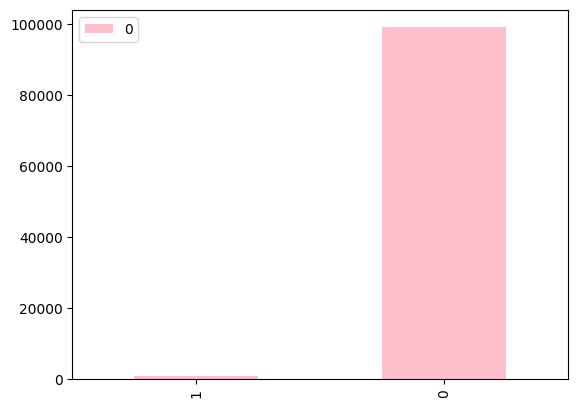

In [6]:
state_counts = Counter(df['is_fraud'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [7]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=1337, 
                                                      test_size=0.25) 

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">AdaBoosting </span></div>

## Trials

In [60]:
start=time.time()
ad_estimator_rnd = AdaBoostClassifier(random_state=1337)
ad_estimator_rnd.fit(X_train, y_train)
print("Runtime (in secs):", time.time()-start)
print("Accuracy on training set: %f" % ad.score(X_train, y_train))
print("Accuracy on testing set: %f" % ad.score(X_test, y_test))

Runtime (in secs): 43.27207589149475
Accuracy on training set: 0.993027
Accuracy on testing set: 0.992840


In [61]:
start=time.time()
ad_estimator_rnd = AdaBoostClassifier(random_state=1337, n_estimators=10)
ad_estimator_rnd.fit(X_train, y_train)
print("Runtime (in secs):", time.time()-start)
print("Accuracy on training set: %f" % ad.score(X_train, y_train))
print("Accuracy on testing set: %f" % ad.score(X_test, y_test))

Runtime (in secs): 13.358852863311768
Accuracy on training set: 0.993027
Accuracy on testing set: 0.992840


## Hypertuning Parameters

 Using **'random_state'*** and **'n_estimators'** parameters

In [63]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
start=time.time()
for seedN in tqdm(range(1,10)):
    (X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=seedN,
                                                      test_size=0.25)
    training_accuracy = []
    test_accuracy = []
    n_estimators_settings = range(1,10)
    
    for estimator in tqdm(n_estimators_settings):
        ad_estimator_rnd = AdaBoostClassifier(n_estimators=estimator, random_state=seedN)
        #fit model
        ad_estimator_rnd.fit(X_train, y_train)
        
        training_accuracy.append(ad_estimator_rnd.score(X_train, y_train))
        test_accuracy.append(ad_estimator_rnd.score(X_test, y_test))
        
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

print("Runtime (in secs):", time.time()-start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Runtime (in secs): 739.3351099491119


In [64]:
display(all_training, all_test)

,1,2,3,4,5,6,7,8,9
0,0.991480,0.99168,0.991747,0.991547,0.991467,0.991467,0.991067,0.991360,0.991373
1,0.991480,0.99168,0.991747,0.991547,0.991467,0.991467,0.991067,0.991360,0.991373
2,0.991480,0.99168,0.991747,0.991547,0.991467,0.991467,0.991067,0.991360,0.991373
3,0.991480,0.99168,0.991747,0.991547,0.991467,0.991467,0.991067,0.991360,0.991373
4,0.991480,0.99168,0.991747,0.991547,0.991467,0.991467,0.991067,0.991360,0.991373
5,0.993027,0.99292,0.991747,0.992987,0.992880,0.992907,0.992600,0.992827,0.992933
6,0.993027,0.99292,0.993160,0.992987,0.992880,0.992907,0.992600,0.992827,0.992933
7,0.993027,0.99292,0.993160,0.992987,0.992880,0.992907,0.992600,0.992827,0.992933
8,0.993027,0.99292,0.993160,0.992987,0.992880,0.992907,0.992600,0.992827,0.992933


,1,2,3,4,5,6,7,8,9
0,0.99144,0.99108,0.99052,0.99124,0.99176,0.99144,0.99268,0.99208,0.99204
1,0.99144,0.99108,0.99052,0.99124,0.99176,0.99144,0.99268,0.99208,0.99204
2,0.99144,0.99108,0.99052,0.99124,0.99176,0.99144,0.99268,0.99208,0.99204
3,0.99144,0.99108,0.99052,0.99124,0.99176,0.99144,0.99268,0.99208,0.99204
4,0.99144,0.99108,0.99052,0.99124,0.99176,0.99144,0.99268,0.99208,0.99204
5,0.99272,0.99316,0.99052,0.99284,0.99328,0.99304,0.99400,0.99344,0.99312
6,0.99272,0.99316,0.99224,0.99284,0.99328,0.99304,0.99400,0.99344,0.99312
7,0.99272,0.99316,0.99224,0.99284,0.99328,0.99304,0.99400,0.99344,0.99312
8,0.99272,0.99316,0.99224,0.99284,0.99328,0.99304,0.99400,0.99344,0.99312


Highest average Test Set Achieved = {np.max(all_test.mean(axis=1)):%4}
Best number of estimators = 7


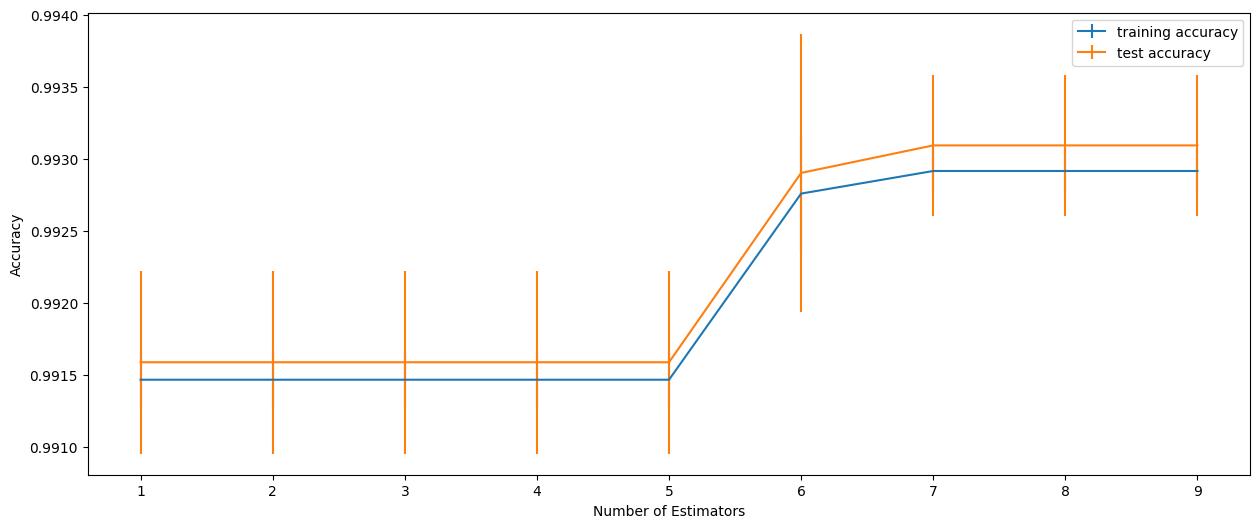

In [65]:
fig = plt.figure(figsize = (15,6))
#Visualize standard deviation
plt.errorbar(n_estimators_settings, all_training.mean(axis=1),
            yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(n_estimators_settings, all_test.mean(axis=1),
            yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Estimators")
plt.legend()

#optimize depth
bestnestimator = np.argmax(all_test.mean(axis=1)) + 1
print("Highest average Test Set Achieved = {np.max(all_test.mean(axis=1)):%4}")
print("Best number of estimators = %d" % bestnestimator)

In [66]:
start=time.time()
ad_estimator_rnd = AdaBoostClassifier(n_estimators=7, random_state=7)
ad_estimator_rnd.fit(X_train,y_train)

print("Accuracy on training set: %f" % ad_estimator_rnd.score(X_train, y_train))
print("Accuracy on testing set: %f" % ad_estimator_rnd.score(X_test, y_test))
print("Runtime (in secs):", time.time()-start)

Accuracy on training set: 0.992933
Accuracy on testing set: 0.993120
Runtime (in secs): 12.00104022026062


In [67]:
ad_estimator_rnd.feature_importances_

array([0.        , 0.        , 0.        , 0.57142857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [80]:
pd.DataFrame({'column': X.columns, 'feat_imp': ad_estimator_rnd.feature_importances_})\
                .sort_values('feat_imp', ascending=False)[:10]

,column,feat_imp
3,amt,0.571429
946,part_of_day_breakfast,0.142857
718,category_gas_transport,0.142857
720,category_grocery_pos,0.142857
0,lat,0.000000
631,job_Software engineer,0.000000
636,job_Special educational needs teacher,0.000000
635,"job_Sound technician, broadcasting/film/video",0.000000
634,"job_Solicitor, Scotland",0.000000
633,job_Solicitor,0.000000


In [70]:
# save the model to a pickle file
pickle_file_name = "ad_randomst_nestimators.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(ad_estimator_rnd, file)

 Using **'learning_rate'** and **'n_estimators'** parameters

In [87]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
start=time.time()
n_estimators_settings = range(1, 10)
for estimator in tqdm(n_estimators_settings):
    (X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                      y, 
                                                      random_state=10,
                                                      test_size=0.25)
    training_accuracy = []
    test_accuracy = []
    learning_rate = range(1, 10)
    
    for rate in tqdm(learning_rate_settings):
        ad_lr_estimator = AdaBoostClassifier(n_estimators=estimator, learning_rate=rate, random_state=10)
        #fit model
        ad_lr_estimator.fit(X_train, y_train)
        
        training_accuracy.append(ad_lr_estimator.score(X_train, y_train))
        test_accuracy.append(ad_lr_estimator.score(X_test, y_test))
        
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

print("Runtime (in secs):", time.time()-start)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Runtime (in secs): 613.0701892375946


In [88]:
display(all_training, all_test)

,9
0,0.992987
1,0.991787
2,0.991587
3,0.991560
4,0.990733
5,0.990733
6,0.990733
7,0.990747
8,0.990747


,9
0,0.99296
1,0.99152
2,0.99144
3,0.99144
4,0.99084
5,0.99084
6,0.99084
7,0.99088
8,0.99088


Highest average Test Set Achieved = 0.992960
Best learning_rate = 1


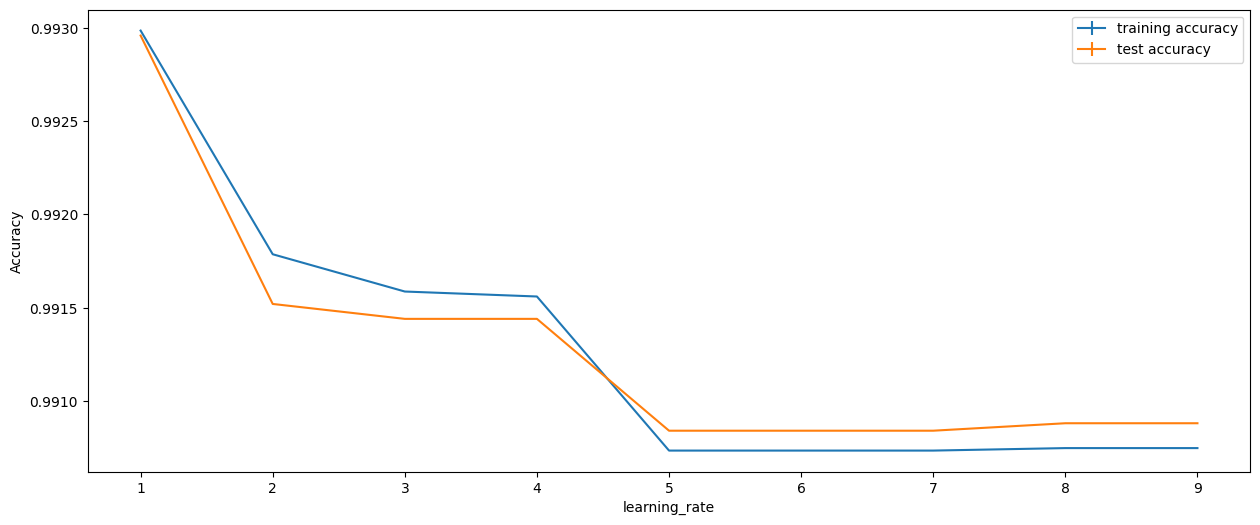

In [89]:
fig = plt.figure(figsize = (15,6))
#Visualize standard deviation
plt.errorbar(learning_rate_settings, all_training.mean(axis=1),
            yerr=all_training.std(axis=1), label="training accuracy")
plt.errorbar(learning_rate_settings, all_test.mean(axis=1),
            yerr=all_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()

#optimize depth
bestlearning_rate = np.argmax(all_test.mean(axis=1)) + 1
print("Highest average Test Set Achieved = %f" % np.max(all_test.mean(axis=1)))
print("Best learning_rate = %d" % bestlearning_rate)

In [90]:
start=time.time()
ad_lr_estimator = AdaBoostClassifier(n_estimators=1, learning_rate=1, random_state=10)
ad_lr_estimator.fit(X_train,y_train)

print("Accuracy on training set: %f" % ad_lr_estimator.score(X_train, y_train))
print("Accuracy on testing set: %f" % ad_lr_estimator.score(X_test, y_test))
print("Runtime (in secs):", time.time()-start)

Accuracy on training set: 0.991560
Accuracy on testing set: 0.991480
Runtime (in secs): 3.0759530067443848


In [91]:
ad_lr_estimator.feature_importances_

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [92]:
pd.DataFrame({'column': X.columns, 'feat_imp': ad_lr_estimator.feature_importances_})\
                .sort_values('feat_imp', ascending=False)[:10]

,column,feat_imp
3,amt,1.0
0,lat,0.0
639,job_Sport and exercise psychologist,0.0
627,job_Site engineer,0.0
628,"job_Social research officer, government",0.0
629,job_Social researcher,0.0
630,job_Social worker,0.0
631,job_Software engineer,0.0
632,job_Soil scientist,0.0
633,job_Solicitor,0.0


In [93]:
# save the model to a pickle file
pickle_file_name = "ad_learningr_nestimators.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(ad_lr_estimator, file)